# Environmental Impact of Food Production Analysis

## Overview
This notebook analyzes the environmental impact of food production, focusing on key metrics such as carbon emissions, water usage, land use, and biodiversity loss.

## Business Questions
1. What are the top food products with the highest environmental impact?
2. How does the environmental impact vary across different farming methods?
3. What is the relationship between water usage and carbon emissions in food production?
4. Which regions have the most sustainable food production practices?
5. How does land use efficiency correlate with environmental impact?
6. What are the trends in environmental impact over time for different food categories?
7. How can we optimize food production to minimize environmental impact?

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from pathlib import Path

# Set style for better visualizations
sns.set_theme()  # This replaces plt.style.use('seaborn')
sns.set_palette("husl")

# Display all columns
pd.set_option('display.max_columns', None)

# Create results directory if it doesn't exist
results_dir = Path("../results")
results_dir.mkdir(exist_ok=True)

## Data Loading and Initial Exploration

In [2]:
# Load the dataset
df = pd.read_csv('../data/Food_Production.csv')

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

# Display first few rows
print("\nFirst few rows:")
display(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                      

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,11.23,8.638462,183.911552,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,35.07,49.394366,609.983722,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


## Data Preprocessing

In [3]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Basic statistics
print("\nBasic statistics:")
print(df.describe())

# Calculate total missing values percentage
total_missing = df.isnull().sum().sum()
total_cells = df.size
missing_percentage = (total_missing / total_cells) * 100
print(f"\nTotal missing values percentage: {missing_percentage:.2f}%")

Missing values:
Food product                                                                0
Land use change                                                             0
Animal Feed                                                                 0
Farm                                                                        0
Processing                                                                  0
Transport                                                                   0
Packging                                                                    0
Retail                                                                      0
Total_emissions                                                             0
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                   10
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                    5
Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)      16
Freshwater withdrawals per 1000kcal (liters per 

## Business Question 1: Top Food Products with Highest Environmental Impact

C:\Users\hbempong\AppData\Local\Temp\ipykernel_4112\381716982.py:9: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.

C:\Users\hbempong\AppData\Local\Temp\ipykernel_4112\381716982.py:10: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.

C:\Users\hbempong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.



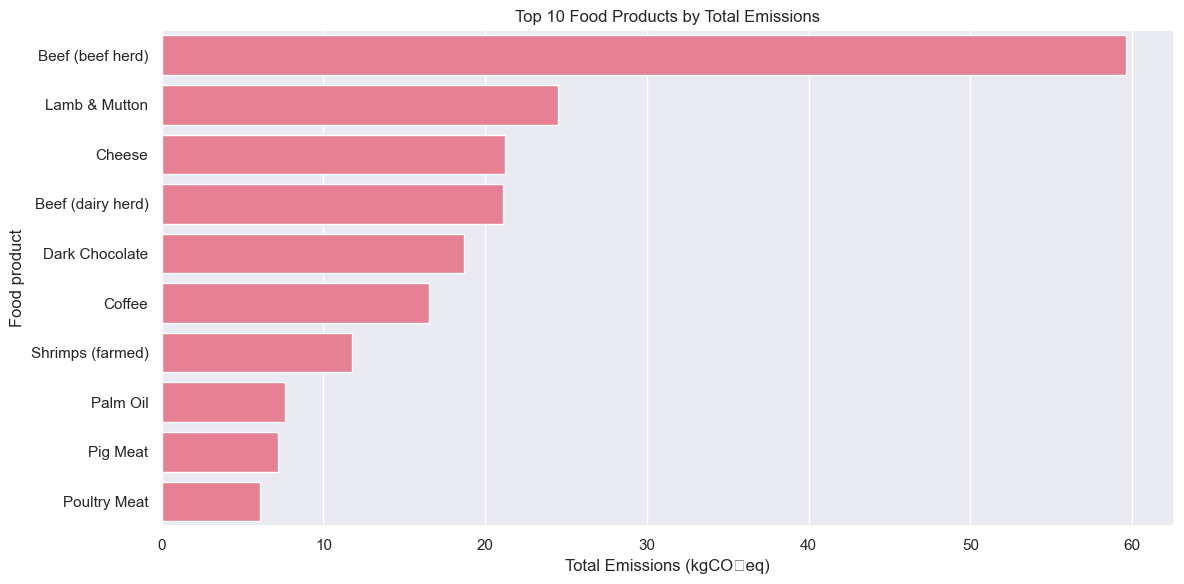


Top 5 Products by Total Emissions:


,Food product,Total_emissions
33,Beef (beef herd),59.6
35,Lamb & Mutton,24.5
39,Cheese,21.2
34,Beef (dairy herd),21.1
32,Dark Chocolate,18.7


In [5]:
# Sort by total emissions
top_emissions = df.nlargest(10, 'Total_emissions')

# Create static plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_emissions, x='Total_emissions', y='Food product')
plt.title('Top 10 Food Products by Total Emissions')
plt.xlabel('Total Emissions (kgCO₂eq)')
plt.tight_layout()
plt.savefig(results_dir / 'top_emissions.png')
plt.show()

# Create interactive plot
fig = px.bar(top_emissions, 
             x='Total_emissions', 
             y='Food product',
             title='Top 10 Food Products by Total Emissions')
fig.show()
# Save the static plot


# Display the data
print("\nTop 5 Products by Total Emissions:")
display(top_emissions[['Food product', 'Total_emissions']].head())

## Business Question 2: Environmental Impact Across Production Stages

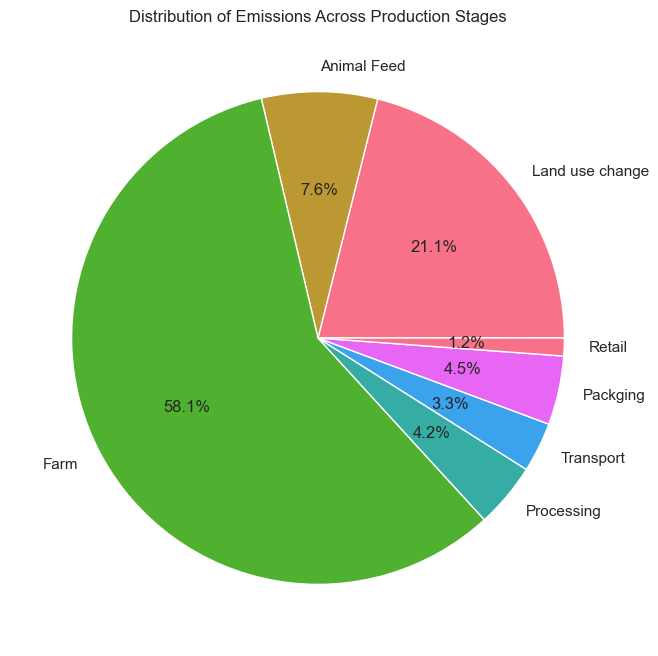


Emissions Distribution by Stage:


Land use change    1.260465
Animal Feed        0.453488
Farm               3.469767
Processing         0.253488
Transport          0.195349
Packging           0.269767
Retail             0.069767
dtype: float64

C:\Users\hbempong\AppData\Local\Temp\ipykernel_4112\696187671.py:30: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.

C:\Users\hbempong\AppData\Local\Temp\ipykernel_4112\696187671.py:31: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.

C:\Users\hbempong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.



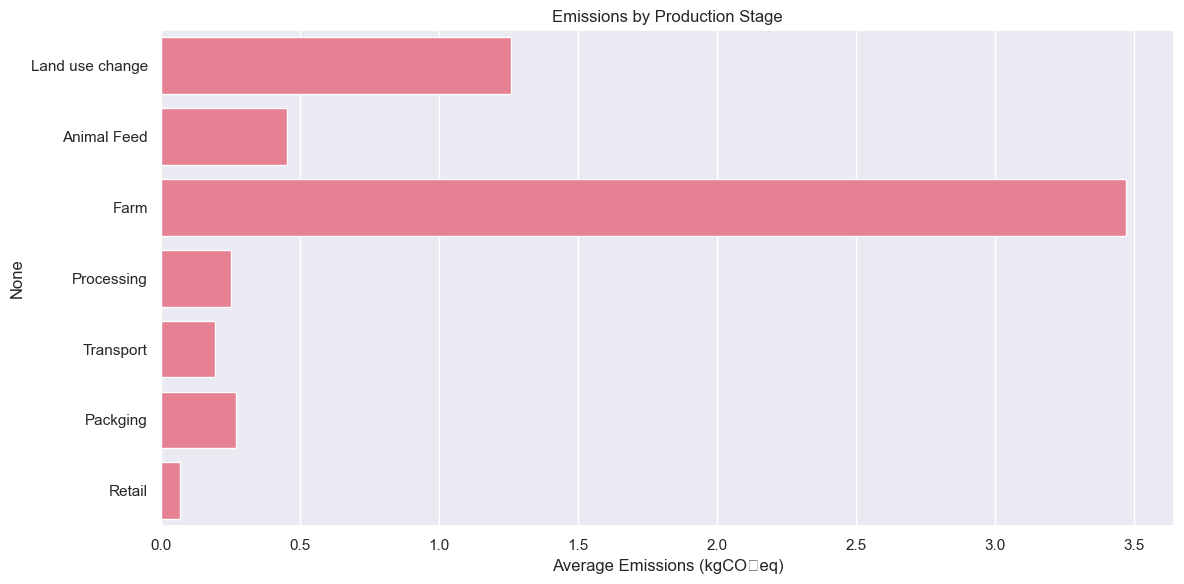

In [6]:
# Select emission columns for production stages
emission_cols = ['Land use change', 'Animal Feed', 'Farm', 'Processing', 
                'Transport', 'Packging', 'Retail']

# Calculate mean emissions by stage
stage_emissions = df[emission_cols].mean()

# Create static pie chart
plt.figure(figsize=(10, 8))
plt.pie(stage_emissions, labels=emission_cols, autopct='%1.1f%%')
plt.title('Distribution of Emissions Across Production Stages')
plt.savefig(results_dir / 'emissions_by_stage.png')
plt.show()

# Create interactive pie chart
fig = px.pie(values=stage_emissions.values, 
             names=stage_emissions.index,
             title='Distribution of Emissions Across Production Stages')
fig.show()

# Display the data
print("\nEmissions Distribution by Stage:")
display(stage_emissions)

# Create bar chart for comparison
plt.figure(figsize=(12, 6))
sns.barplot(x=stage_emissions.values, y=stage_emissions.index)
plt.title('Emissions by Production Stage')
plt.xlabel('Average Emissions (kgCO₂eq)')
plt.tight_layout()
plt.savefig(results_dir / 'emissions_by_stage_bar.png')
plt.show()


## Business Question 3: Water Usage vs Carbon Emissions


Missing values in relevant columns:
Freshwater withdrawals per kilogram (liters per kilogram)    5
Total_emissions                                              0
Land use per kilogram (m² per kilogram)                      5
dtype: int64


C:\Users\hbempong\AppData\Local\Temp\ipykernel_4112\1758092798.py:21: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.

C:\Users\hbempong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.



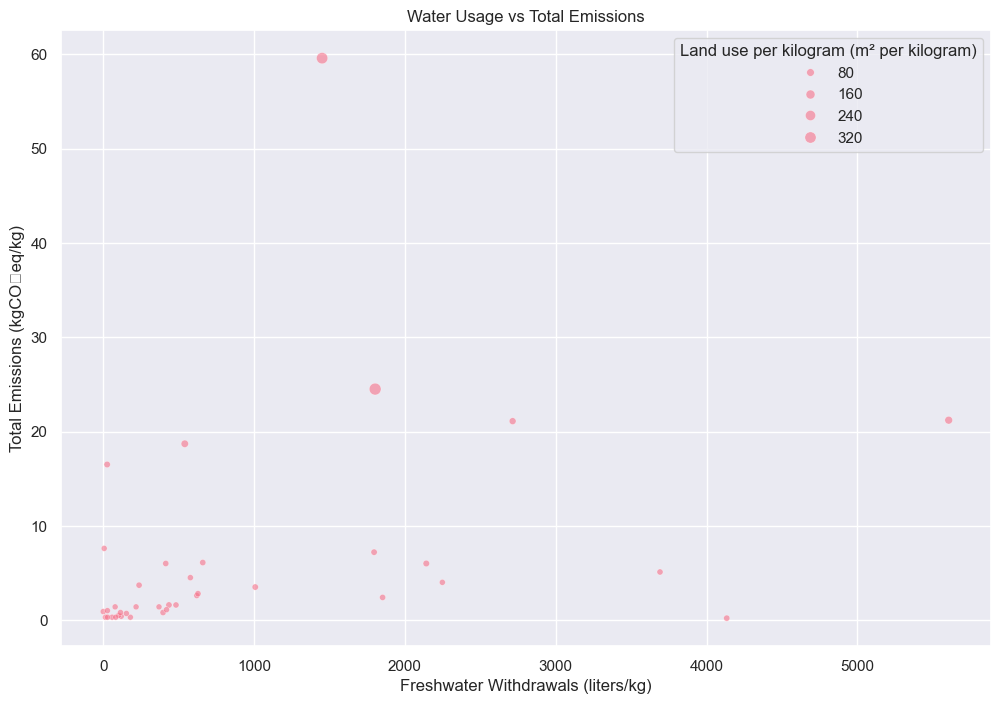


Correlation between water usage and emissions: 0.329


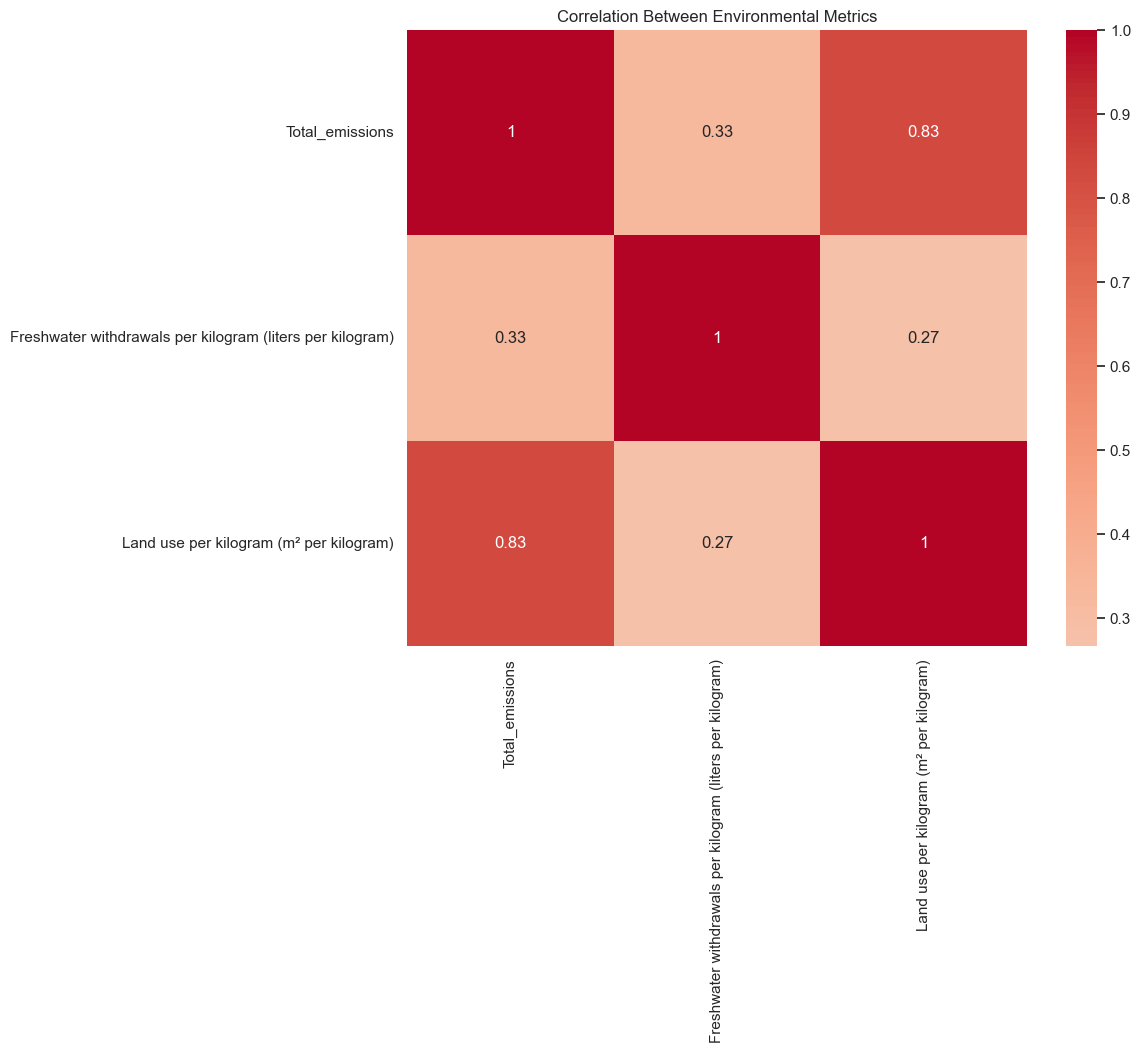

In [8]:
print("Missing values in relevant columns:")
print(df[['Freshwater withdrawals per kilogram (liters per kilogram)', 
          'Total_emissions', 
          'Land use per kilogram (m² per kilogram)']].isnull().sum())

# Create a clean dataset without missing values for our analysis
df_clean = df.dropna(subset=['Freshwater withdrawals per kilogram (liters per kilogram)',
                            'Total_emissions',
                            'Land use per kilogram (m² per kilogram)'])

# Create static scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_clean,
                x='Freshwater withdrawals per kilogram (liters per kilogram)',
                y='Total_emissions',
                size='Land use per kilogram (m² per kilogram)',
                alpha=0.6)
plt.title('Water Usage vs Total Emissions')
plt.xlabel('Freshwater Withdrawals (liters/kg)')
plt.ylabel('Total Emissions (kgCO₂eq/kg)')
plt.savefig('../results/water_usage_vs_emissions.png')
plt.show()

# Create interactive scatter plot
fig = px.scatter(df_clean,
                x='Freshwater withdrawals per kilogram (liters per kilogram)',
                y='Total_emissions',
                size='Land use per kilogram (m² per kilogram)',
                hover_data=['Food product'],
                title='Water Usage vs Total Emissions')
fig.show()

# Calculate correlation
correlation = df_clean['Freshwater withdrawals per kilogram (liters per kilogram)'].corr(df_clean['Total_emissions'])
print(f"\nCorrelation between water usage and emissions: {correlation:.3f}")

# Create correlation heatmap for key environmental metrics
env_metrics = ['Total_emissions',
               'Freshwater withdrawals per kilogram (liters per kilogram)',
               'Land use per kilogram (m² per kilogram)']

plt.figure(figsize=(10, 8))
sns.heatmap(df_clean[env_metrics].corr(), 
            annot=True, 
            cmap='coolwarm', 
            center=0)
plt.title('Correlation Between Environmental Metrics')
plt.savefig('../results/environmental_correlations.png')
plt.show()

# Business Question 4: Land Use vs Environmental Impact
# How does land use efficiency correlate with environmental impact?


Missing values in land use related columns:
Land use per kilogram (m² per kilogram)             5
Land use per 1000kcal (m² per 1000kcal)            10
Land use per 100g protein (m² per 100g protein)    16
Total_emissions                                     0
dtype: int64


C:\Users\hbempong\AppData\Local\Temp\ipykernel_4112\2307524881.py:21: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.

C:\Users\hbempong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.



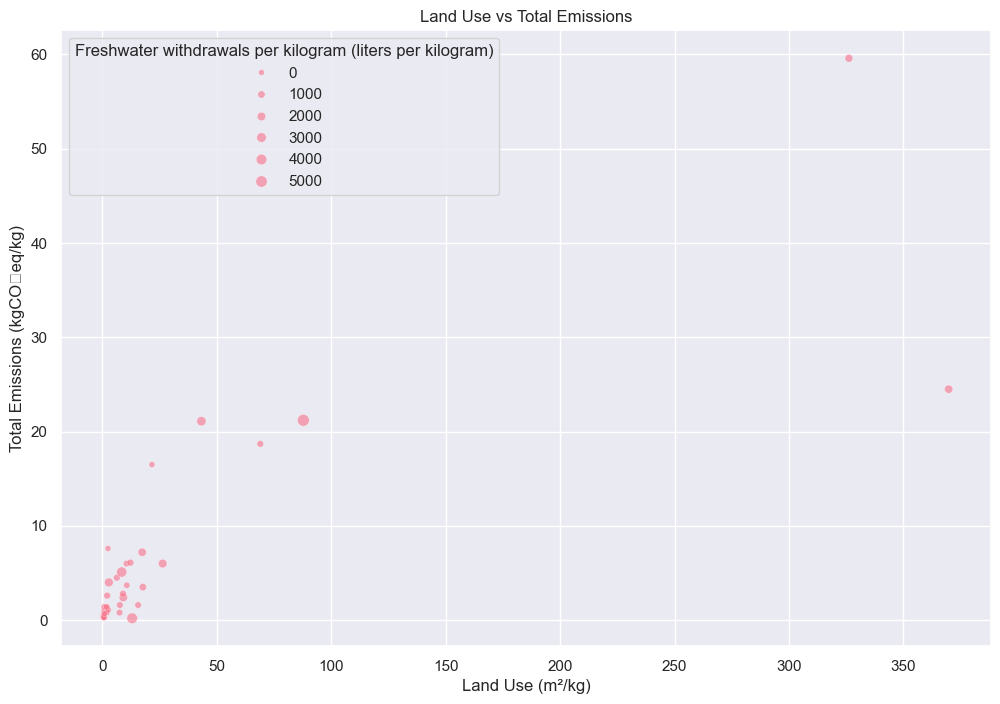

C:\Users\hbempong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\utils.py:61: UserWarning:

Glyph 8324 (\N{SUBSCRIPT FOUR}) missing from font(s) Arial.




Correlation between land use and emissions: 0.831


C:\Users\hbempong\AppData\Local\Temp\ipykernel_4112\2307524881.py:49: UserWarning:

Glyph 8324 (\N{SUBSCRIPT FOUR}) missing from font(s) Arial.

C:\Users\hbempong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 8324 (\N{SUBSCRIPT FOUR}) missing from font(s) Arial.



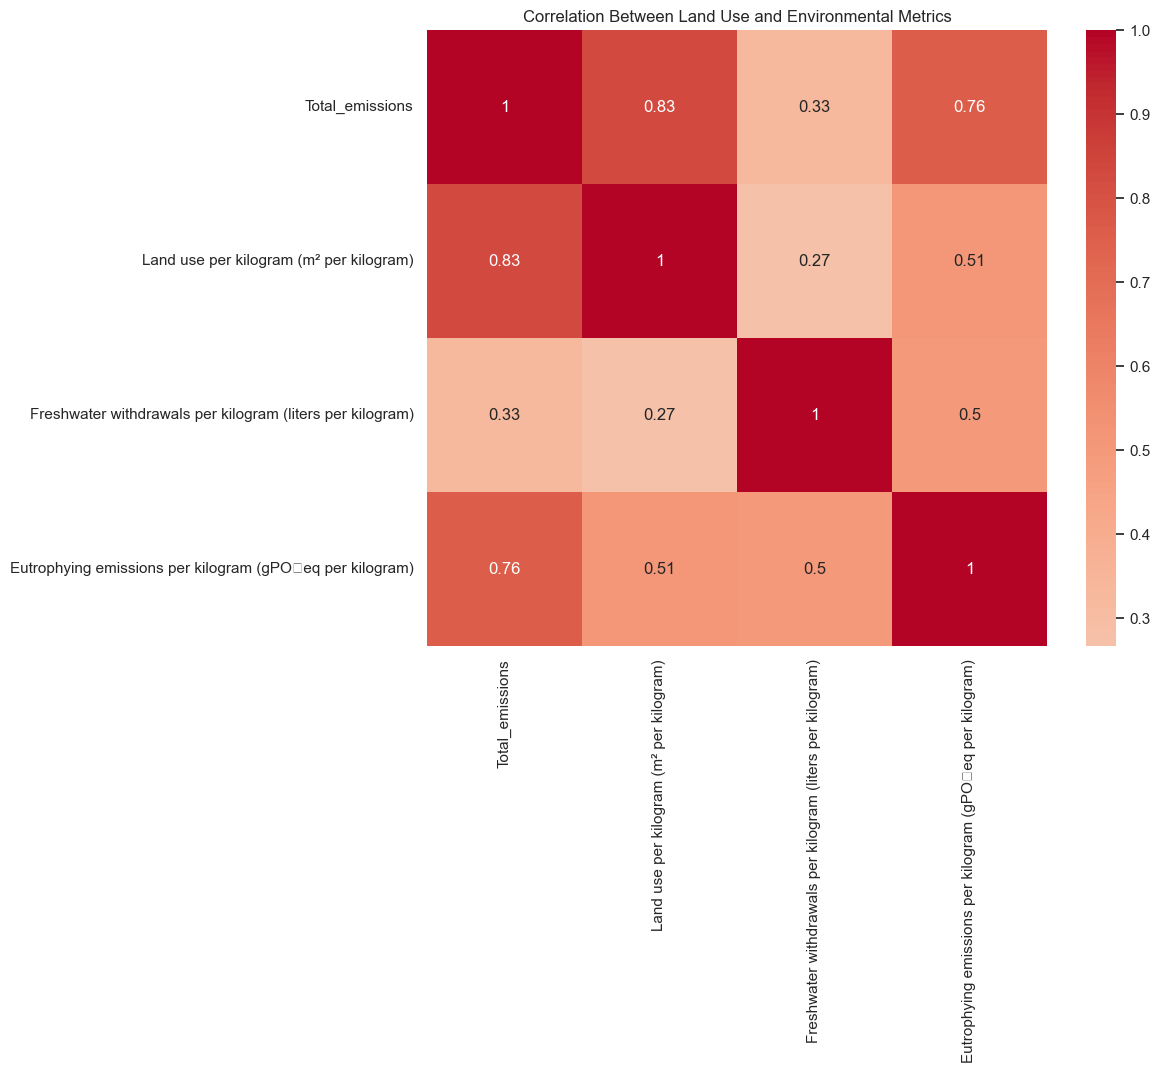


Top 5 products by land use efficiency (lowest land use per kg):
        Food product  Land use per kilogram (m² per kilogram)
22   Root Vegetables                                     0.33
24  Other Vegetables                                     0.38
21    Onions & Leeks                                     0.39
23         Brassicas                                     0.55
27            Apples                                     0.63

Top 5 products by highest land use per kg:
         Food product  Land use per kilogram (m² per kilogram)
35      Lamb & Mutton                                   369.81
33   Beef (beef herd)                                   326.21
39             Cheese                                    87.79
32     Dark Chocolate                                    68.96
34  Beef (dairy herd)                                    43.24


In [9]:
print("Missing values in land use related columns:")
print(df[['Land use per kilogram (m² per kilogram)',
          'Land use per 1000kcal (m² per 1000kcal)',
          'Land use per 100g protein (m² per 100g protein)',
          'Total_emissions']].isnull().sum())

# Create a clean dataset without missing values
df_clean = df.dropna(subset=['Land use per kilogram (m² per kilogram)',
                            'Total_emissions'])

# Create static scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_clean,
                x='Land use per kilogram (m² per kilogram)',
                y='Total_emissions',
                size='Freshwater withdrawals per kilogram (liters per kilogram)',
                alpha=0.6)
plt.title('Land Use vs Total Emissions')
plt.xlabel('Land Use (m²/kg)')
plt.ylabel('Total Emissions (kgCO₂eq/kg)')
plt.savefig('../results/land_use_vs_emissions.png')
plt.show()

# Create interactive scatter plot
fig = px.scatter(df_clean,
                x='Land use per kilogram (m² per kilogram)',
                y='Total_emissions',
                size='Freshwater withdrawals per kilogram (liters per kilogram)',
                hover_data=['Food product'],
                title='Land Use vs Total Emissions')
fig.show()

# Calculate correlation
correlation = df_clean['Land use per kilogram (m² per kilogram)'].corr(df_clean['Total_emissions'])
print(f"\nCorrelation between land use and emissions: {correlation:.3f}")

# Create correlation heatmap for land use and environmental metrics
land_metrics = ['Total_emissions',
                'Land use per kilogram (m² per kilogram)',
                'Freshwater withdrawals per kilogram (liters per kilogram)',
                'Eutrophying emissions per kilogram (gPO₄eq per kilogram)']

plt.figure(figsize=(10, 8))
sns.heatmap(df_clean[land_metrics].corr(), 
            annot=True, 
            cmap='coolwarm', 
            center=0)
plt.title('Correlation Between Land Use and Environmental Metrics')
plt.savefig('../results/land_use_correlations.png')
plt.show()

# Top 5 products by land use efficiency (lowest land use per kg)
print("\nTop 5 products by land use efficiency (lowest land use per kg):")
land_efficiency = df_clean.nsmallest(5, 'Land use per kilogram (m² per kilogram)')[['Food product', 'Land use per kilogram (m² per kilogram)']]
print(land_efficiency)

# Top 5 products by highest land use
print("\nTop 5 products by highest land use per kg:")
land_inefficiency = df_clean.nlargest(5, 'Land use per kilogram (m² per kilogram)')[['Food product', 'Land use per kilogram (m² per kilogram)']]
print(land_inefficiency)